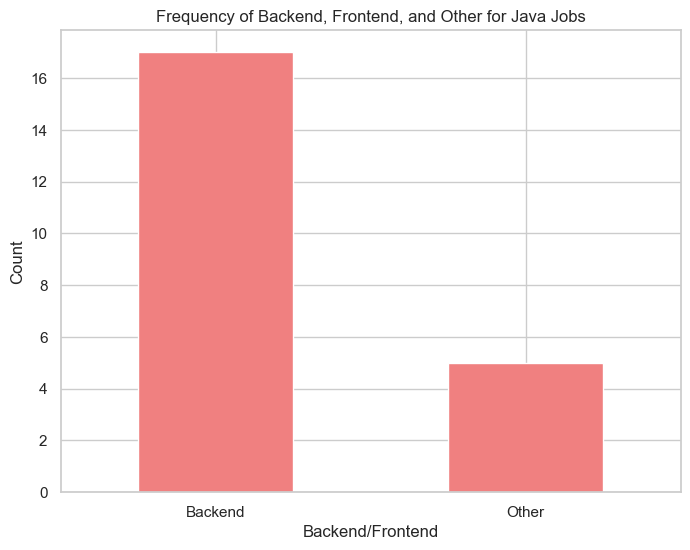

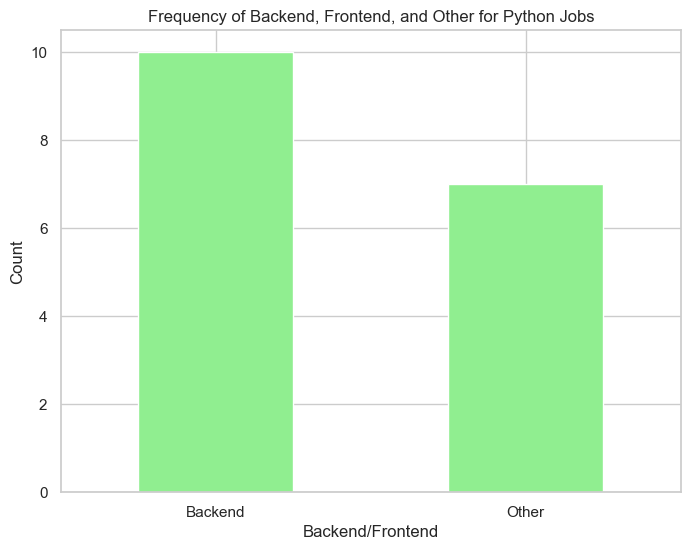

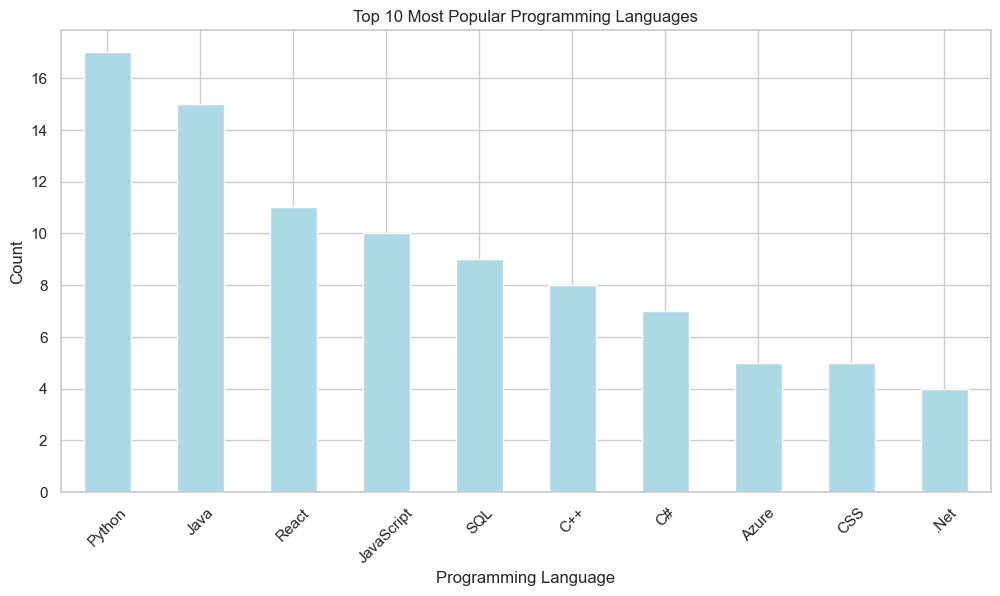

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the CSV file
file_path = 'data/data_jobs.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Clean the data: Fill missing values and remove unnecessary whitespace
data_cleaned = data.fillna('').apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Filter Java and Python jobs separately
java_jobs = data_cleaned[data_cleaned['Platform/Technology'].str.contains('Java', case=False, na=False)].copy()
python_jobs = data_cleaned[data_cleaned['Platform/Technology'].str.contains('Python', case=False, na=False)].copy()

# Simplify the Backend/Frontend column for both Java and Python jobs
java_jobs['Backend/Frontend'] = java_jobs['Backend/Frontend'].apply(lambda x: 'Backend' if 'Backend' in x else ('Frontend' if 'Frontend' in x else 'Other'))
python_jobs['Backend/Frontend'] = python_jobs['Backend/Frontend'].apply(lambda x: 'Backend' if 'Backend' in x else ('Frontend' if 'Frontend' in x else 'Other'))

# Calculate the frequency for each
java_backend_frontend_counts = java_jobs['Backend/Frontend'].value_counts()
python_backend_frontend_counts = python_jobs['Backend/Frontend'].value_counts()

# Plot the frequency for Java jobs
plt.figure(figsize=(8, 6))
java_backend_frontend_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Backend, Frontend, and Other for Java Jobs')
plt.xlabel('Backend/Frontend')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot the frequency for Python jobs
plt.figure(figsize=(8, 6))
python_backend_frontend_counts.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Backend, Frontend, and Other for Python Jobs')
plt.xlabel('Backend/Frontend')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot the top 10 most popular languages
languages = data_cleaned['Platform/Technology'].str.split(', ').explode()
language_counts = languages.value_counts().head(10)
plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Most Popular Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
